In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_function(theta, X, y):
    y_hat = sigmoid(theta[0] + theta[1] * X)
    loss = -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

def gradient(theta, X, y):
    y_hat = sigmoid(theta[0] + theta[1] * X)
    gradient_0 = np.sum(y_hat - y)
    gradient_1 = np.sum((y_hat - y) * X)
    return np.array([gradient_0, gradient_1])

In [17]:
def gradient_descent(X, y, learning_rate, num_iterations):

    theta = np.array([0.0, 0.0])  # Initialization
    losses = []
    theta_path = [theta.copy()]

    for _ in range(num_iterations):

        grad = gradient(theta, X, y)
        theta -= learning_rate * grad
        theta_path.append(theta.copy())
        losses.append(loss_function(theta, X, y))

    return theta, theta_path, losses

In [18]:
X = np.array([-3, -2, -1, 0, 1, 2, 3, 4])
y = np.array([1, 1, 1, 1, 0, 1, 0, 0])

learning_rate = 0.01
num_iterations = 1000

theta_opt, theta_path, losses = gradient_descent(X, y, learning_rate, num_iterations)

theta0_vals = np.linspace(-5, 5, 100)
theta1_vals = np.linspace(-5, 5, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
loss_grid = np.zeros_like(theta0_grid)

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        loss_grid[i, j] = loss_function([theta0_grid[i, j], theta1_grid[i, j]], X, y)

print("Optimizer (theta_0, theta_1):", theta_opt)

Optimizer (theta_0, theta_1): [ 1.86797788 -1.24319766]


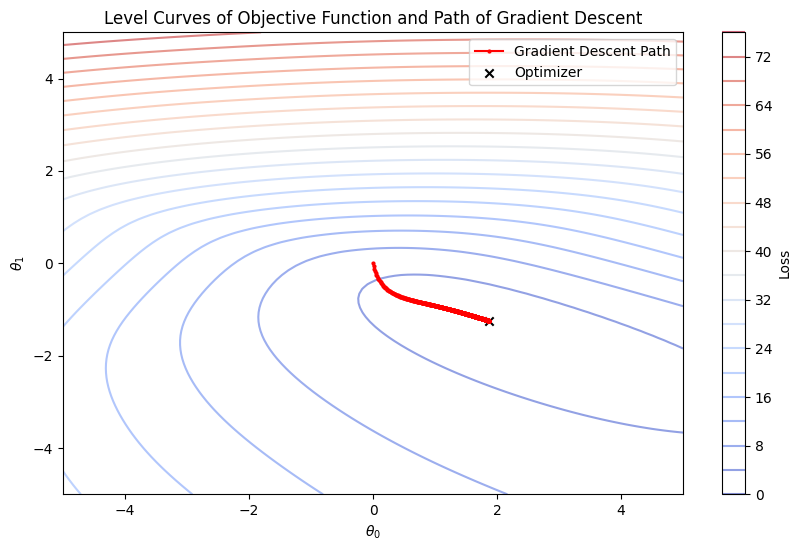

In [19]:
plt.figure(figsize=(10, 6))
plt.contour(theta0_grid, theta1_grid, loss_grid, levels=20, cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Loss')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

theta_path = np.array(theta_path)
plt.plot(theta_path[:, 0], theta_path[:, 1], color='red', marker='o', markersize=2, label='Gradient Descent Path')
plt.scatter(theta_opt[0], theta_opt[1], color='black', marker='x', label='Optimizer')
plt.title('Level Curves of Objective Function and Path of Gradient Descent')
plt.legend()
plt.grid(False)
plt.show()